<a href="https://colab.research.google.com/github/joeyeuron/Case-Study-CE880/blob/main/Draft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Data Exploration and Preprocessing

In [2]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.xlsx to loan_data (1).xlsx


### Load dataset using pandas

In [5]:
excel_file = pd.ExcelFile('loan_data.xlsx')
df = excel_file.parse(excel_file.sheet_names[0])

###Perform Exploratory Data Analysis (EDA)

In [6]:
# Print the first few rows of the dataset to get an initial idea of the data
print(df.head())

  Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0   Male      No          0      Graduate            No            584900   
1   Male     Yes          1      Graduate            No            458300   
2   Male     Yes          0      Graduate           Yes            300000   
3   Male     Yes          0  Not Graduate            No            258300   
4   Male      No          0      Graduate            No            600000   

   Coapplicant_Income  Loan_Amount   Term  Credit_History   Area Status  
0                 0.0     15000000  360.0             1.0  Urban      Y  
1            150800.0     12800000  360.0             1.0  Rural      N  
2                 0.0      6600000  360.0             1.0  Urban      Y  
3            235800.0     12000000  360.0             1.0  Urban      Y  
4                 0.0     14100000  360.0             1.0  Urban      Y  


In [7]:
# Get basic information about the dataset (number of rows, columns, data types, etc.)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB
None


In [8]:
# Get statistical summary of the numerical columns
print(df.describe())

       Applicant_Income  Coapplicant_Income   Loan_Amount       Term  \
count      6.140000e+02        6.140000e+02  6.140000e+02  600.00000   
mean       5.403459e+05        1.621246e+05  1.414104e+07  342.00000   
std        6.109042e+05        2.926248e+05  8.815682e+06   65.12041   
min        1.500000e+04        0.000000e+00  0.000000e+00   12.00000   
25%        2.877500e+05        0.000000e+00  9.800000e+06  360.00000   
50%        3.812500e+05        1.188500e+05  1.250000e+07  360.00000   
75%        5.795000e+05        2.297250e+05  1.647500e+07  360.00000   
max        8.100000e+06        4.166700e+06  7.000000e+07  480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [9]:
# Check the distribution of the target variable 'Status'
print(df['Status'].value_counts())

Y    422
N    192
Name: Status, dtype: int64


###Pre-processing

In [10]:
#Check for Missing Values
print(df.isnull().sum())

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64


In [11]:
# Example of imputing missing values with mean or mode for respective columns
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Term'].fillna(df['Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [12]:
# Convert 'Dependents' column to strings (if needed)
df['Dependents'] = df['Dependents'].astype(str)

# Using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Convert 'Dependents' column to strings (if needed)
df['Dependents'] = df['Dependents'].astype(str)

# Using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns for one-hot encoding (excluding 'Status')
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Area']

onehot_encoder = OneHotEncoder()
encoded_features = onehot_encoder.fit_transform(df[categorical_columns])
feature_names = onehot_encoder.get_feature_names_out(input_features=categorical_columns)
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), pd.DataFrame(encoded_features.toarray(), columns=feature_names)], axis=1)



### Further EDA

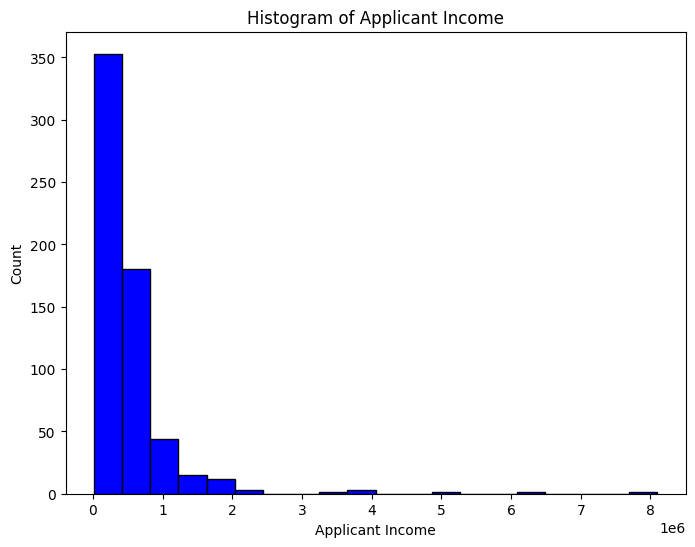

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for Applicant_Income
plt.figure(figsize=(8, 6))
plt.hist(df_encoded['Applicant_Income'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.title('Histogram of Applicant Income')
plt.show()

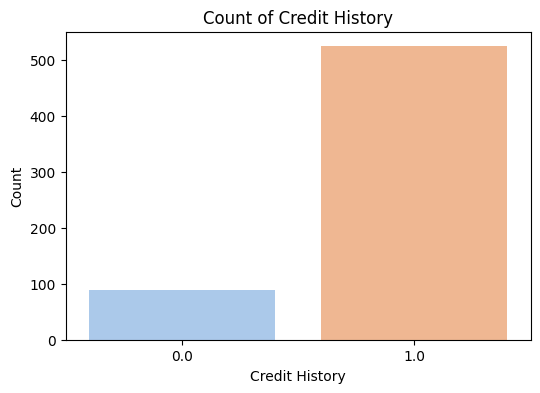

In [14]:
# 2. Bar Chart for Credit_History
plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_History', data=df_encoded, palette='pastel')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Count of Credit History')
plt.show()

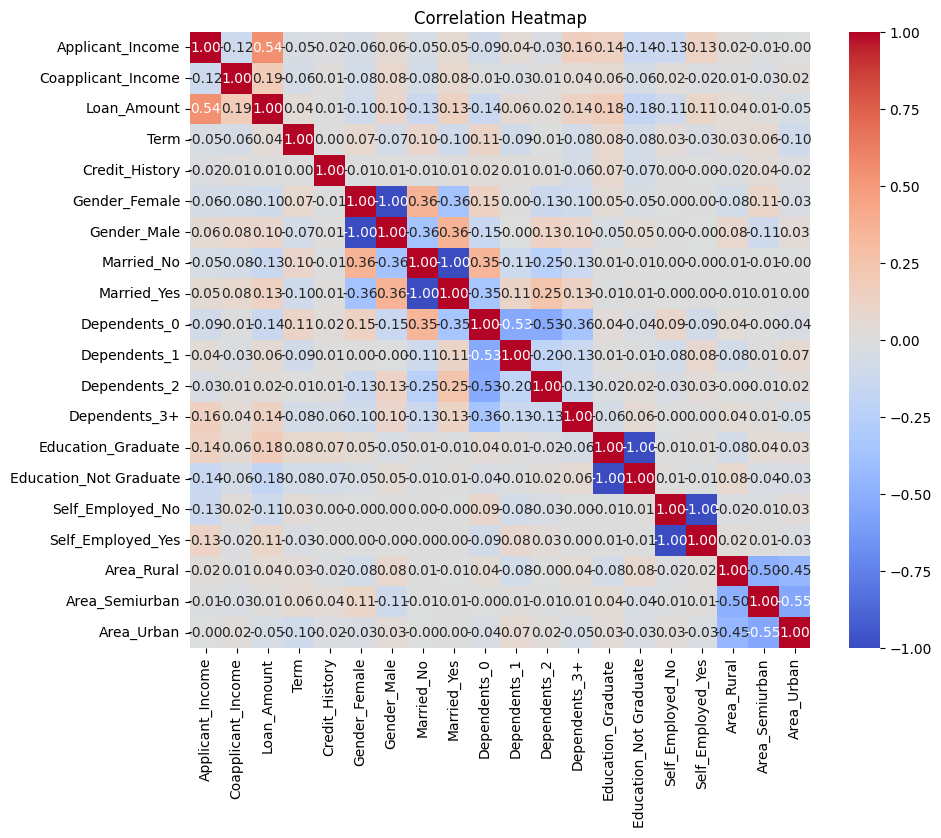

In [15]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

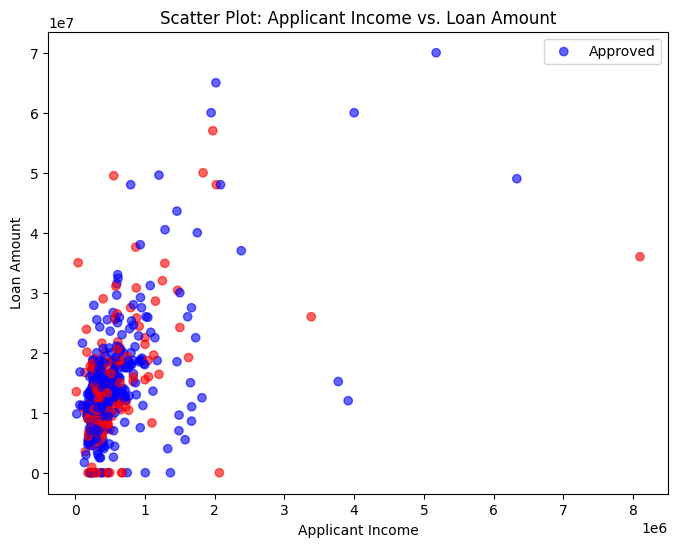

In [16]:
# 4. Scatter Plot for Applicant_Income vs. Loan_Amount
plt.figure(figsize=(8, 6))
plt.scatter(df_encoded['Applicant_Income'], df_encoded['Loan_Amount'], c=df_encoded['Status'].map({'Y': 'blue', 'N': 'red'}), alpha=0.6)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.legend(['Approved', 'Not Approved'])
plt.show()

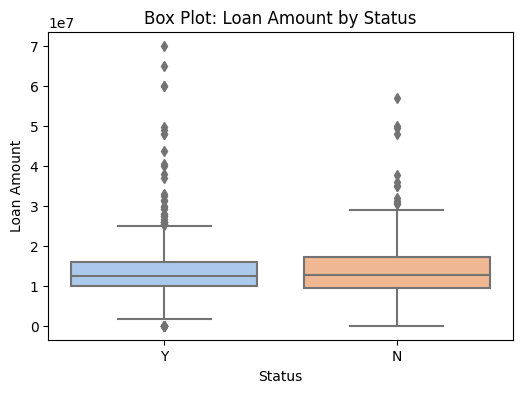

In [17]:
# 5. Box Plot for Loan_Amount by Status
plt.figure(figsize=(6, 4))
sns.boxplot(x='Status', y='Loan_Amount', data=df_encoded, palette='pastel')
plt.xlabel('Status')
plt.ylabel('Loan Amount')
plt.title('Box Plot: Loan Amount by Status')
plt.show()

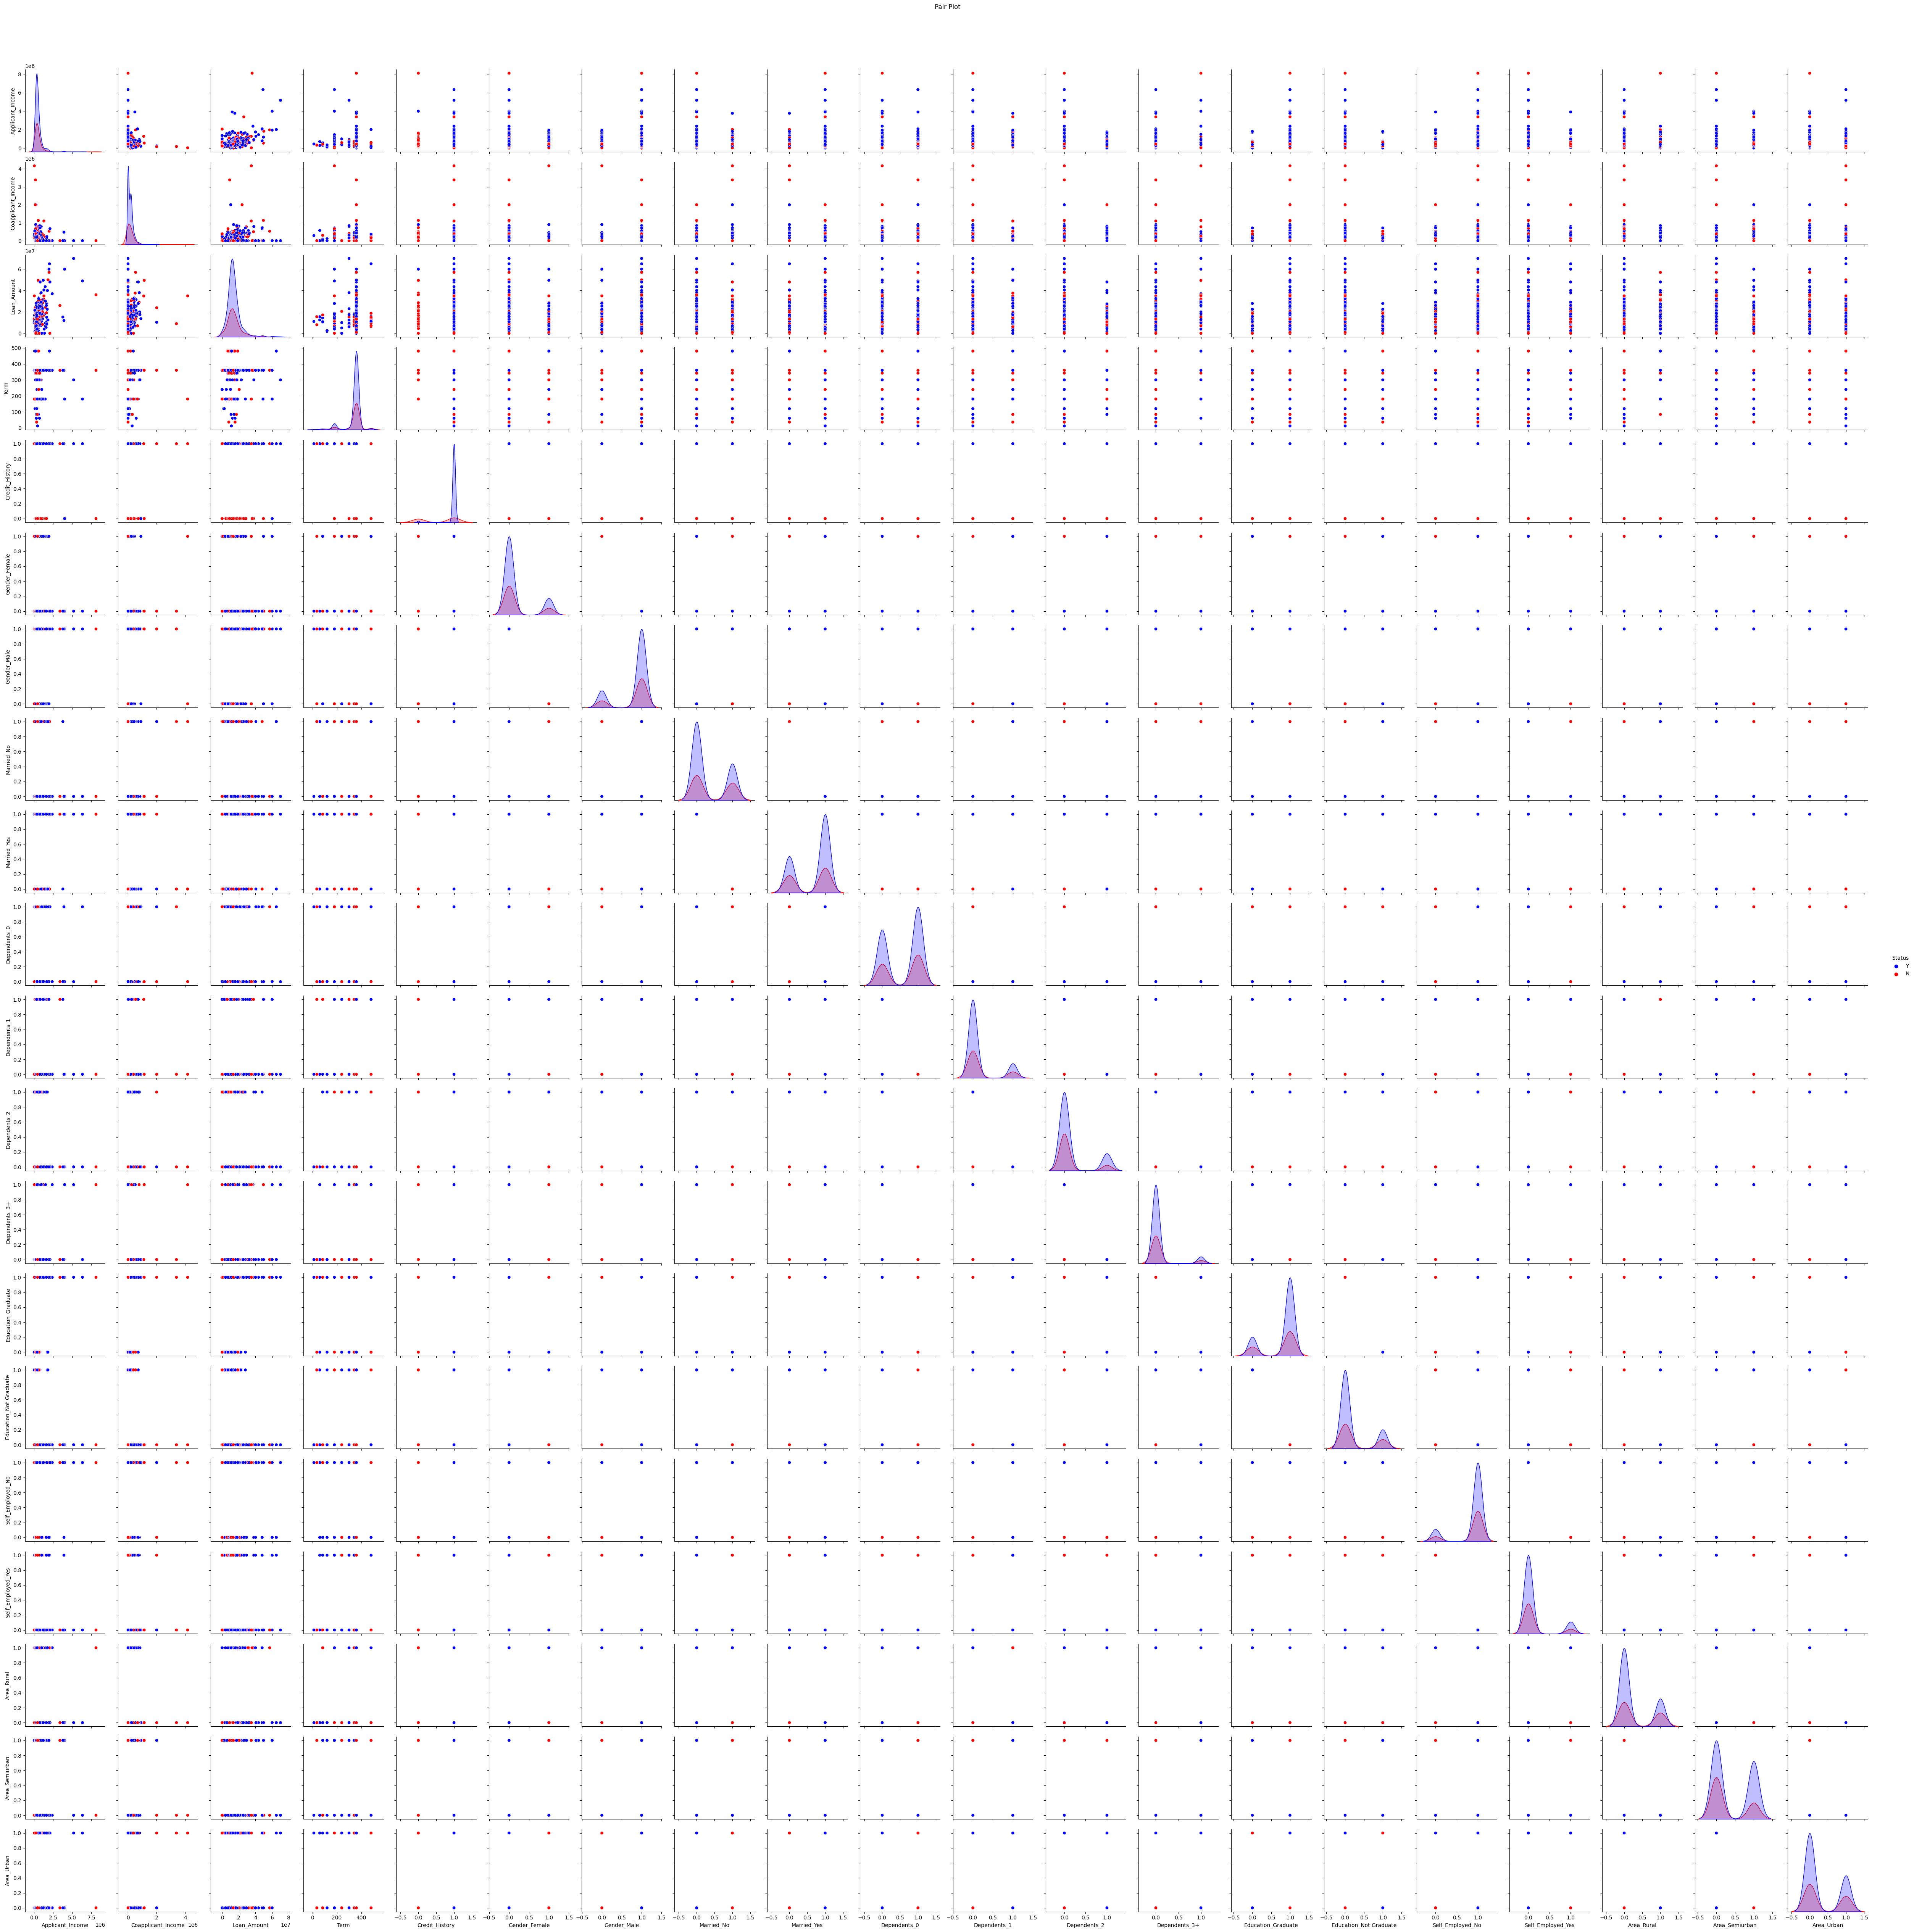

In [18]:
# 6. Pair Plot
sns.pairplot(df_encoded, hue='Status', palette={'Y': 'blue', 'N': 'red'})
plt.suptitle('Pair Plot', y=1.02)
plt.show()

# Data Splitting

In [19]:
from sklearn.model_selection import train_test_split

# Assuming 'df_encoded' contains your preprocessed and encoded DataFrame

# Split the features (X) and the target variable (y)
X = df_encoded.drop('Status', axis=1)
y = df_encoded['Status']

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Features for training
# y_train: Target variable for training
# X_val: Features for validation
# y_val: Target variable for validation


# Model Selection and Training

### Scaling feature Data for Model

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_val are your training and validation data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


###Support Vector Machine Model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize the SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid to search
svm_param_grid = {
    'kernel': ['linear', 'rbf'],  # Try different kernels
    'C': [0.1, 1, 10],            # Regularization parameter
    'gamma': [0.1, 1, 10]         # Kernel coefficient for 'rbf'
}

# Perform GridSearchCV for hyperparameter tuning
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_svm_model = svm_grid_search.best_estimator_


###Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
rf_param_grid = {
    'n_estimators': [50, 100, 200],     # Number of trees
    'max_depth': [None, 5, 10, 20],     # Maximum depth of trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required to be at a leaf node
}

# Perform GridSearchCV for hyperparameter tuning
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_rf_model = rf_grid_search.best_estimator_


Accuracy: 0.7723577235772358
Classification Report:
              precision    recall  f1-score   support

           N       0.83      0.44      0.58        43
           Y       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



###K-Nearest Neighbour Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid to search
knn_param_grid = {
    'n_neighbors': [3, 5, 7],       # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]                     # Power parameter for the Minkowski metric
}

# Perform GridSearchCV for hyperparameter tuning
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_knn_model = knn_grid_search.best_estimator_


###Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameter grid to search
gb_param_grid = {
    'n_estimators': [50, 100, 200],     # Number of boosting stages to be run
    'learning_rate': [0.1, 0.01, 0.001],  # Step size at each boosting iteration
    'max_depth': [3, 5, 7]              # Maximum depth of individual decision trees
}

# Perform GridSearchCV for hyperparameter tuning
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_gb_model = gb_grid_search.best_estimator_


###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the hyperparameter grid to search (not many hyperparameters for Naive Bayes)
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # The smoothing parameter for variance estimation
}

# Perform GridSearchCV for hyperparameter tuning
nb_grid_search = GridSearchCV(nb_classifier, nb_param_grid, cv=5)
nb_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_nb_model = nb_grid_search.best_estimator_


#Model Evaluation

###Support Vector Machine

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained and obtained the best SVM model
y_pred_svm = best_svm_model.predict(X_val)

# Evaluate SVM model's performance
accuracy_svm = accuracy_score(y_val, y_pred_svm)
precision_svm = precision_score(y_val, y_pred_svm, pos_label='Y')
recall_svm = recall_score(y_val, y_pred_svm, pos_label='Y')
f1_svm = f1_score(y_val, y_pred_svm, pos_label='Y')

print("SVM Accuracy:", accuracy_svm)
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1 Score:", f1_svm)


# Decision Tree Classifier with criterion gini index

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

## Predict the Test set results with criterion gini index

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

## Check accuracy score with criterion gini index

In [ ]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

## Compare the train-set and test-set accuracy

In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

## Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

## Visualize decision-trees

In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

# Random Forest Classifier model with default parameters

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

## Random Forest Classifier model with parameter n_estimators=100

In [ ]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

## Find important features with Random Forest model

In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

In [ ]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_,
                           index=X_train.columns).sort_values(ascending=False)
feature_scores

Most important is variance and least important is entropy

## Visualize feature scores of the features

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

## Build Random Forest model on selected features

In [ ]:
# declare feature vector and target variable
X = df.drop(['Class', 'Entropy'], axis=1) # dropping least important feature
y = df['Class']

In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [ ]:
#Now, I will build the random forest model and check accuracy.
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)
# Check accuracy score
print('Model accuracy score with Entropy variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


## Confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


## Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# KNN

## Scaling the data

In [ ]:
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

## Result Visualisation

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

The best result is captured at k = 1 and 2 hence they are used for the final model

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(1)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

## 1. Confusion Matrix

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 2. Classification Report

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

## 3. ROC - AUC

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=1) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)